In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

In [2]:
saws = wrangle.wrangle_saws()
saws.head(1)

,zipcode,location,year_month,gallons_consumed
Record #,,,,
274262,78229,ACCOLON DR,17-JAN,6733


In [3]:
saws_train, saws_validate, saws_test = wrangle.split_data(saws)

___

In [4]:
saws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145776 entries, 274262 to 545921
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   zipcode           145776 non-null  int64 
 1   location          145776 non-null  object
 2   year_month        145776 non-null  object
 3   gallons_consumed  145776 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.6+ MB


In [5]:
saws['test'] = saws['year_month']

In [6]:
saws[['year','month']] = saws.test.str.split("-",expand=True)

In [7]:
# set what we are going to create these dummies from
dummy_saws =  pd.get_dummies(saws['year'])
# Name the new columns
dummy_saws.columns = ['2017', '2018', 
                    '2019', '2020']
# add the dummies to the data frame
saws = pd.concat([saws, dummy_saws], axis=1)

In [8]:
saws.month.value_counts()

DEC    12148
SEP    12148
FEB    12148
JUL    12148
APR    12148
OCT    12148
JUN    12148
MAY    12148
AUG    12148
MAR    12148
JAN    12148
NOV    12148
Name: month, dtype: int64

In [9]:
# set what we are going to create these dummies from
dummy_saws =  pd.get_dummies(saws['month'])
# Name the new column
dummy_saws.columns = ['April', 'August', 'December', 'February', 'January', 'July',
                    'June', 'March', 'May', 'November', 'October', 'September']
# add the dummies to the data frame
saws = pd.concat([saws, dummy_saws], axis=1)

In [10]:
saws = saws.drop(columns=['zipcode', 'test'])

In [11]:
saws.head(1)

,location,year_month,gallons_consumed,year,month,2017,2018,2019,2020,April,...,December,February,January,July,June,March,May,November,October,September
Record #,,,,,,,,,,,,,,,,,,,,,
274262,ACCOLON DR,17-JAN,6733,17,JAN,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
saws.year_month.unique()

array(['17-JAN', '17-FEB', '17-MAR', '17-APR', '17-MAY', '17-JUN',
       '17-JUL', '17-AUG', '17-SEP', '17-OCT', '17-NOV', '17-DEC',
       '18-JAN', '18-FEB', '18-MAR', '18-APR', '18-MAY', '18-JUN',
       '18-JUL', '18-AUG', '18-SEP', '18-OCT', '18-NOV', '18-DEC',
       '19-JAN', '19-FEB', '19-MAR', '19-APR', '19-MAY', '19-JUN',
       '19-JUL', '19-AUG', '19-SEP', '19-OCT', '19-NOV', '19-DEC',
       '20-JAN', '20-FEB', '20-MAR', '20-APR', '20-MAY', '20-JUN',
       '20-JUL', '20-AUG', '20-SEP', '20-OCT', '20-NOV', '20-DEC'],
      dtype=object)

In [13]:
weather_data = {'year_month':['17-JAN', '17-FEB', '17-MAR', '17-APR', '17-MAY', '17-JUN',
                              '17-JUL', '17-AUG', '17-SEP', '17-OCT', '17-NOV', '17-DEC',
                              '18-JAN', '18-FEB', '18-MAR', '18-APR', '18-MAY', '18-JUN',
                              '18-JUL', '18-AUG', '18-SEP', '18-OCT', '18-NOV', '18-DEC',
                              '19-JAN', '19-FEB', '19-MAR', '19-APR', '19-MAY', '19-JUN',
                              '19-JUL', '19-AUG', '19-SEP', '19-OCT', '19-NOV', '19-DEC',
                              '20-JAN', '20-FEB', '20-MAR', '20-APR', '20-MAY', '20-JUN',
                              '20-JUL', '20-AUG', '20-SEP', '20-OCT', '20-NOV', '20-DEC'],
                'temp_high_farenheit':[82,88,86,92,97,100,104,97,96,90,91,82,
                                       74,83,89,86,99,100,103,100,97,89,82,79,
                                       77,85,86,92,92,97,99,103,100,95,84,81,
                                       81,79,91,97,96,98,106,104,98,97,85,79],
                'temp_low_farenheit':[20,39,45,48,50,68,72,66,58,36,36,28,
                                      22,31,47,43,57,73,71,69,64,45,27,33,
                                      32,34,28,37,57,65,65,76,71,35,32,28,
                                      35,30,49,45,57,63,73,69,51,40,34,29],
                'temp_avg_farenheit':[57,64,67,71,75,82,86,83,78,70,66,52,
                                      49,58,66,67,79,84,84,85,78,69,57,53,
                                      52,57,61,68,75,80,84,87,84,71,59,55,
                                      58,56,68,70,77,82,86,87,78,72,65,54],
                'humidity_high_pct':[100,100,100,94,94,97,91,96,94,96,97,100,
                                     100,100,100,100,94,97,97,94,97,97,100,100,
                                     100,100,100,97,97,97,94,93,94,97,97,97,
                                     97,97,100,100,94,94,90,91,97,97,100,97],
                'humidity_low_pct':[14,13,12,14,19,18,18,28,21,13,19,19,
                                    15,24,10,10,22,27,20,23,34,30,20,10, 
                                    21,19,19,14,26,31,23,27,24,16,18,17,
                                    12,17,17,12,22,20,18,16,13,19,12,9],
                'humidity_avg_pct':[63,65,71,68,67,67,59,65,68,62,69,74,
                                    61,78,64,63,65,65,64,61,80,80,71,66,
                                    70,75,67,68,76,72,63,62,64,62,70,64,
                                    68,66,74,69,65,64,62,57,68,63,65,61],
                'pressure_high_hg':[30.75,30.35,30.53,30.26,30.10,30.16,30.17,30.10,30.13,30.35,30.37,30.56,
                                    30.74,30.45,30.35,30.33,30.16,30.08,30.21,30.15,30.13,30.29,30.54,30.42,
                                    30.48,30.59,30.52,30.29,30.06,30.23,30.15,30.06,30.17,30.49,30.56,30.53,
                                    30.59,30.69,30.51,30.22,30.20,30.23,30.08,30.13,30.24,30.32,30.48,30.45],
                'pressure_low_hg':[29.37,29.51,29.59,29.40,29.63,29.59,29.79,29.58,29.71,29.61,29.77,29.79,
                                   29.68,29.65,29.64,29.52,29.64,29.69,29.78,29.75,29.74,29.61,29.56,29.59,
                                   29.71,29.62,29.54,29.46,29.51,29.66,29.72,29.65,29.70,29.62,29.55,29.66,
                                   29.56,29.64,29.61,29.45,29.55,29.57,29.72,29.64,29.64,29.72,29.74,29.72],
                'pressure_avg_hg':[30.03,29.96,30.05,29.89,29.87,29.86,29.97,29.90,29.93,30.01,30.05,30.15,
                                   30.25,30.06,29.98,29.97,29.90,29.88,29.98,29.96,29.93,29.99,30.05,30.05,
                                   30.12,30.00,30.08,29.90,29.84,29.90,29.94,29.89,29.94,29.95,30.07,30.07,
                                   30.08,30.06,30.00,29.91,29.89,29.92,29.90,29.89,29.95,29.98,30.10,30.07]}

weather_data = pd.DataFrame(weather_data)
saws = pd.merge(weather_data, saws, on='year_month', how='outer')

In [14]:
saws

,year_month,temp_high_farenheit,temp_low_farenheit,temp_avg_farenheit,humidity_high_pct,humidity_low_pct,humidity_avg_pct,pressure_high_hg,pressure_low_hg,pressure_avg_hg,...,December,February,January,July,June,March,May,November,October,September
0,17-JAN,82,20,57,100,14,63,30.75,29.37,30.03,...,0,0,1,0,0,0,0,0,0,0
1,17-JAN,82,20,57,100,14,63,30.75,29.37,30.03,...,0,0,1,0,0,0,0,0,0,0
2,17-JAN,82,20,57,100,14,63,30.75,29.37,30.03,...,0,0,1,0,0,0,0,0,0,0
3,17-JAN,82,20,57,100,14,63,30.75,29.37,30.03,...,0,0,1,0,0,0,0,0,0,0
4,17-JAN,82,20,57,100,14,63,30.75,29.37,30.03,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145771,20-DEC,79,29,54,97,9,61,30.45,29.72,30.07,...,1,0,0,0,0,0,0,0,0,0
145772,20-DEC,79,29,54,97,9,61,30.45,29.72,30.07,...,1,0,0,0,0,0,0,0,0,0
145773,20-DEC,79,29,54,97,9,61,30.45,29.72,30.07,...,1,0,0,0,0,0,0,0,0,0
145774,20-DEC,79,29,54,97,9,61,30.45,29.72,30.07,...,1,0,0,0,0,0,0,0,0,0


In [15]:
year_colors = ['red',  
                'c',  
                'gold',  
                'g'] 

In [16]:
month_colors = ['maroon',  
                'orangered',  
                'gold',  
                'lawngreen',  
                'darkolivegreen',  
                'c',  
                'deepskyblue',  
                'slateblue', 
                'mediumorchid',  
                'magenta',  
                'orange',  
                'lightpink'] 

___
# Start Saws Exploration

In [17]:
sns.set(style="darkgrid")

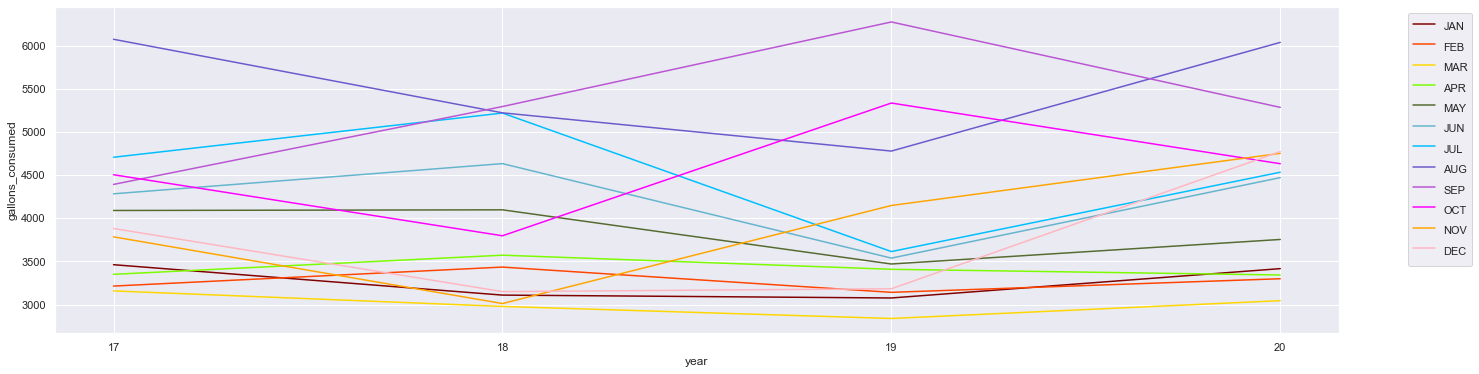

In [51]:
plt.figure(figsize=(23,6))
sns.lineplot(y=saws.gallons_consumed, x=saws.year, 
             hue=saws.month, palette=month_colors, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

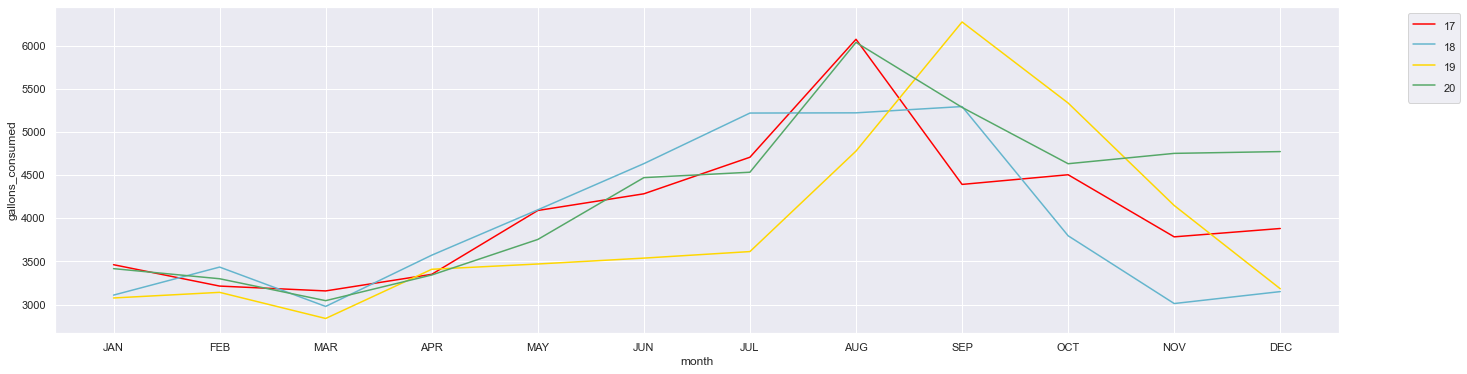

In [50]:
plt.figure(figsize=(23,6))
sns.lineplot(y=saws.gallons_consumed, x=saws.month, 
             hue=saws.year, palette=year_colors, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- September of 2019 has the most water consumption throughout all months and years.
- In 2017 the month of August had the highest recorded water consumption.
- March is the lowest month for water consumption through all 4 years.
- March, January, and April tend to be on the lower side of water consumption.
- February was low in 2017 and 2018 but spikes in 2019 and 2020
- water consumption was lowest for July in 2019
___

### Takeaways:
- 

___

Text(0.5, 1.0, 'Lowest Temp by Year')

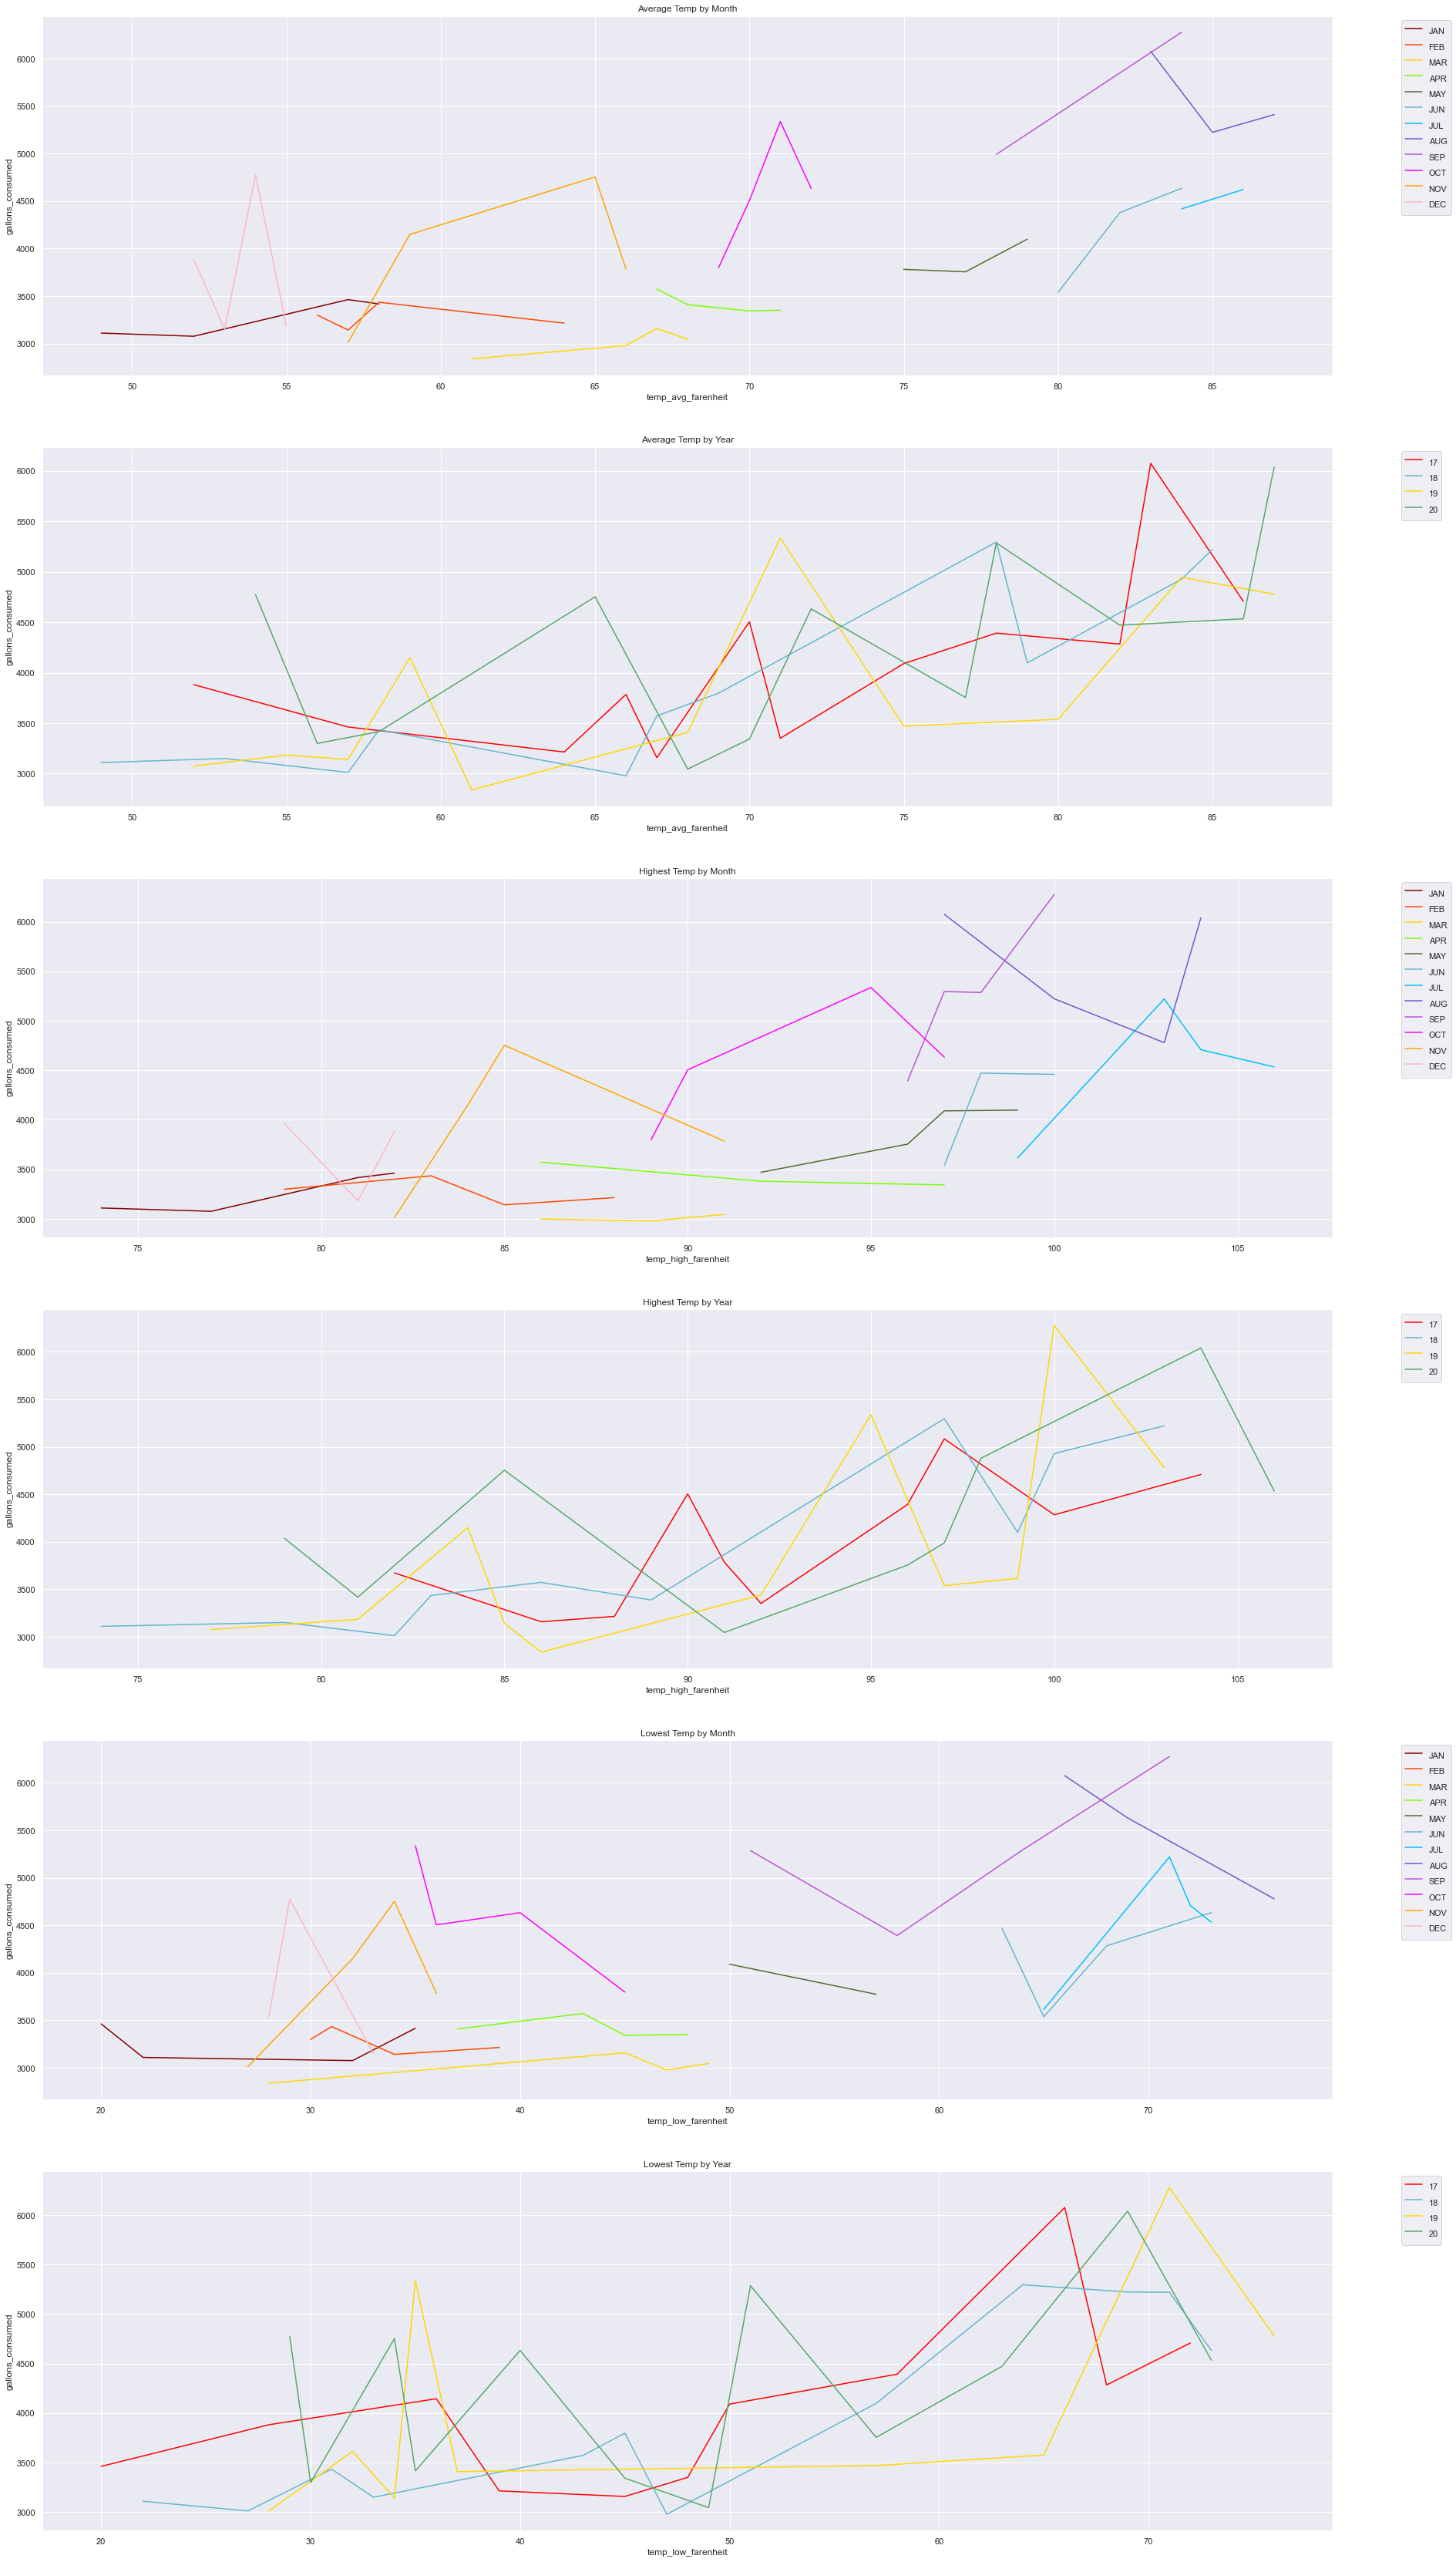

In [61]:
plt.subplots(6,1, figsize=(30,60), sharey=True)
sns.set(style="darkgrid")

plt.subplot(6,1,1)
sns.lineplot(y=saws.gallons_consumed, x=saws.temp_avg_farenheit, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Average Temp by Month')

plt.subplot(6,1,2)
sns.lineplot(y=saws.gallons_consumed, x=saws.temp_avg_farenheit, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Average Temp by Year')

plt.subplot(6,1,3)
sns.lineplot(y=saws.gallons_consumed, x=saws.temp_high_farenheit, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Highest Temp by Month')

plt.subplot(6,1,4)
sns.lineplot(y=saws.gallons_consumed, x=saws.temp_high_farenheit, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Highest Temp by Year')

plt.subplot(6,1,5)
sns.lineplot(y=saws.gallons_consumed, x=saws.temp_low_farenheit, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Lowest Temp by Month')

plt.subplot(6,1,6)
sns.lineplot(y=saws.gallons_consumed, x=saws.temp_low_farenheit, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Lowest Temp by Year')

### Takeaways:
- 

___

Text(0.5, 1.0, 'Lowest Humidity by Year')

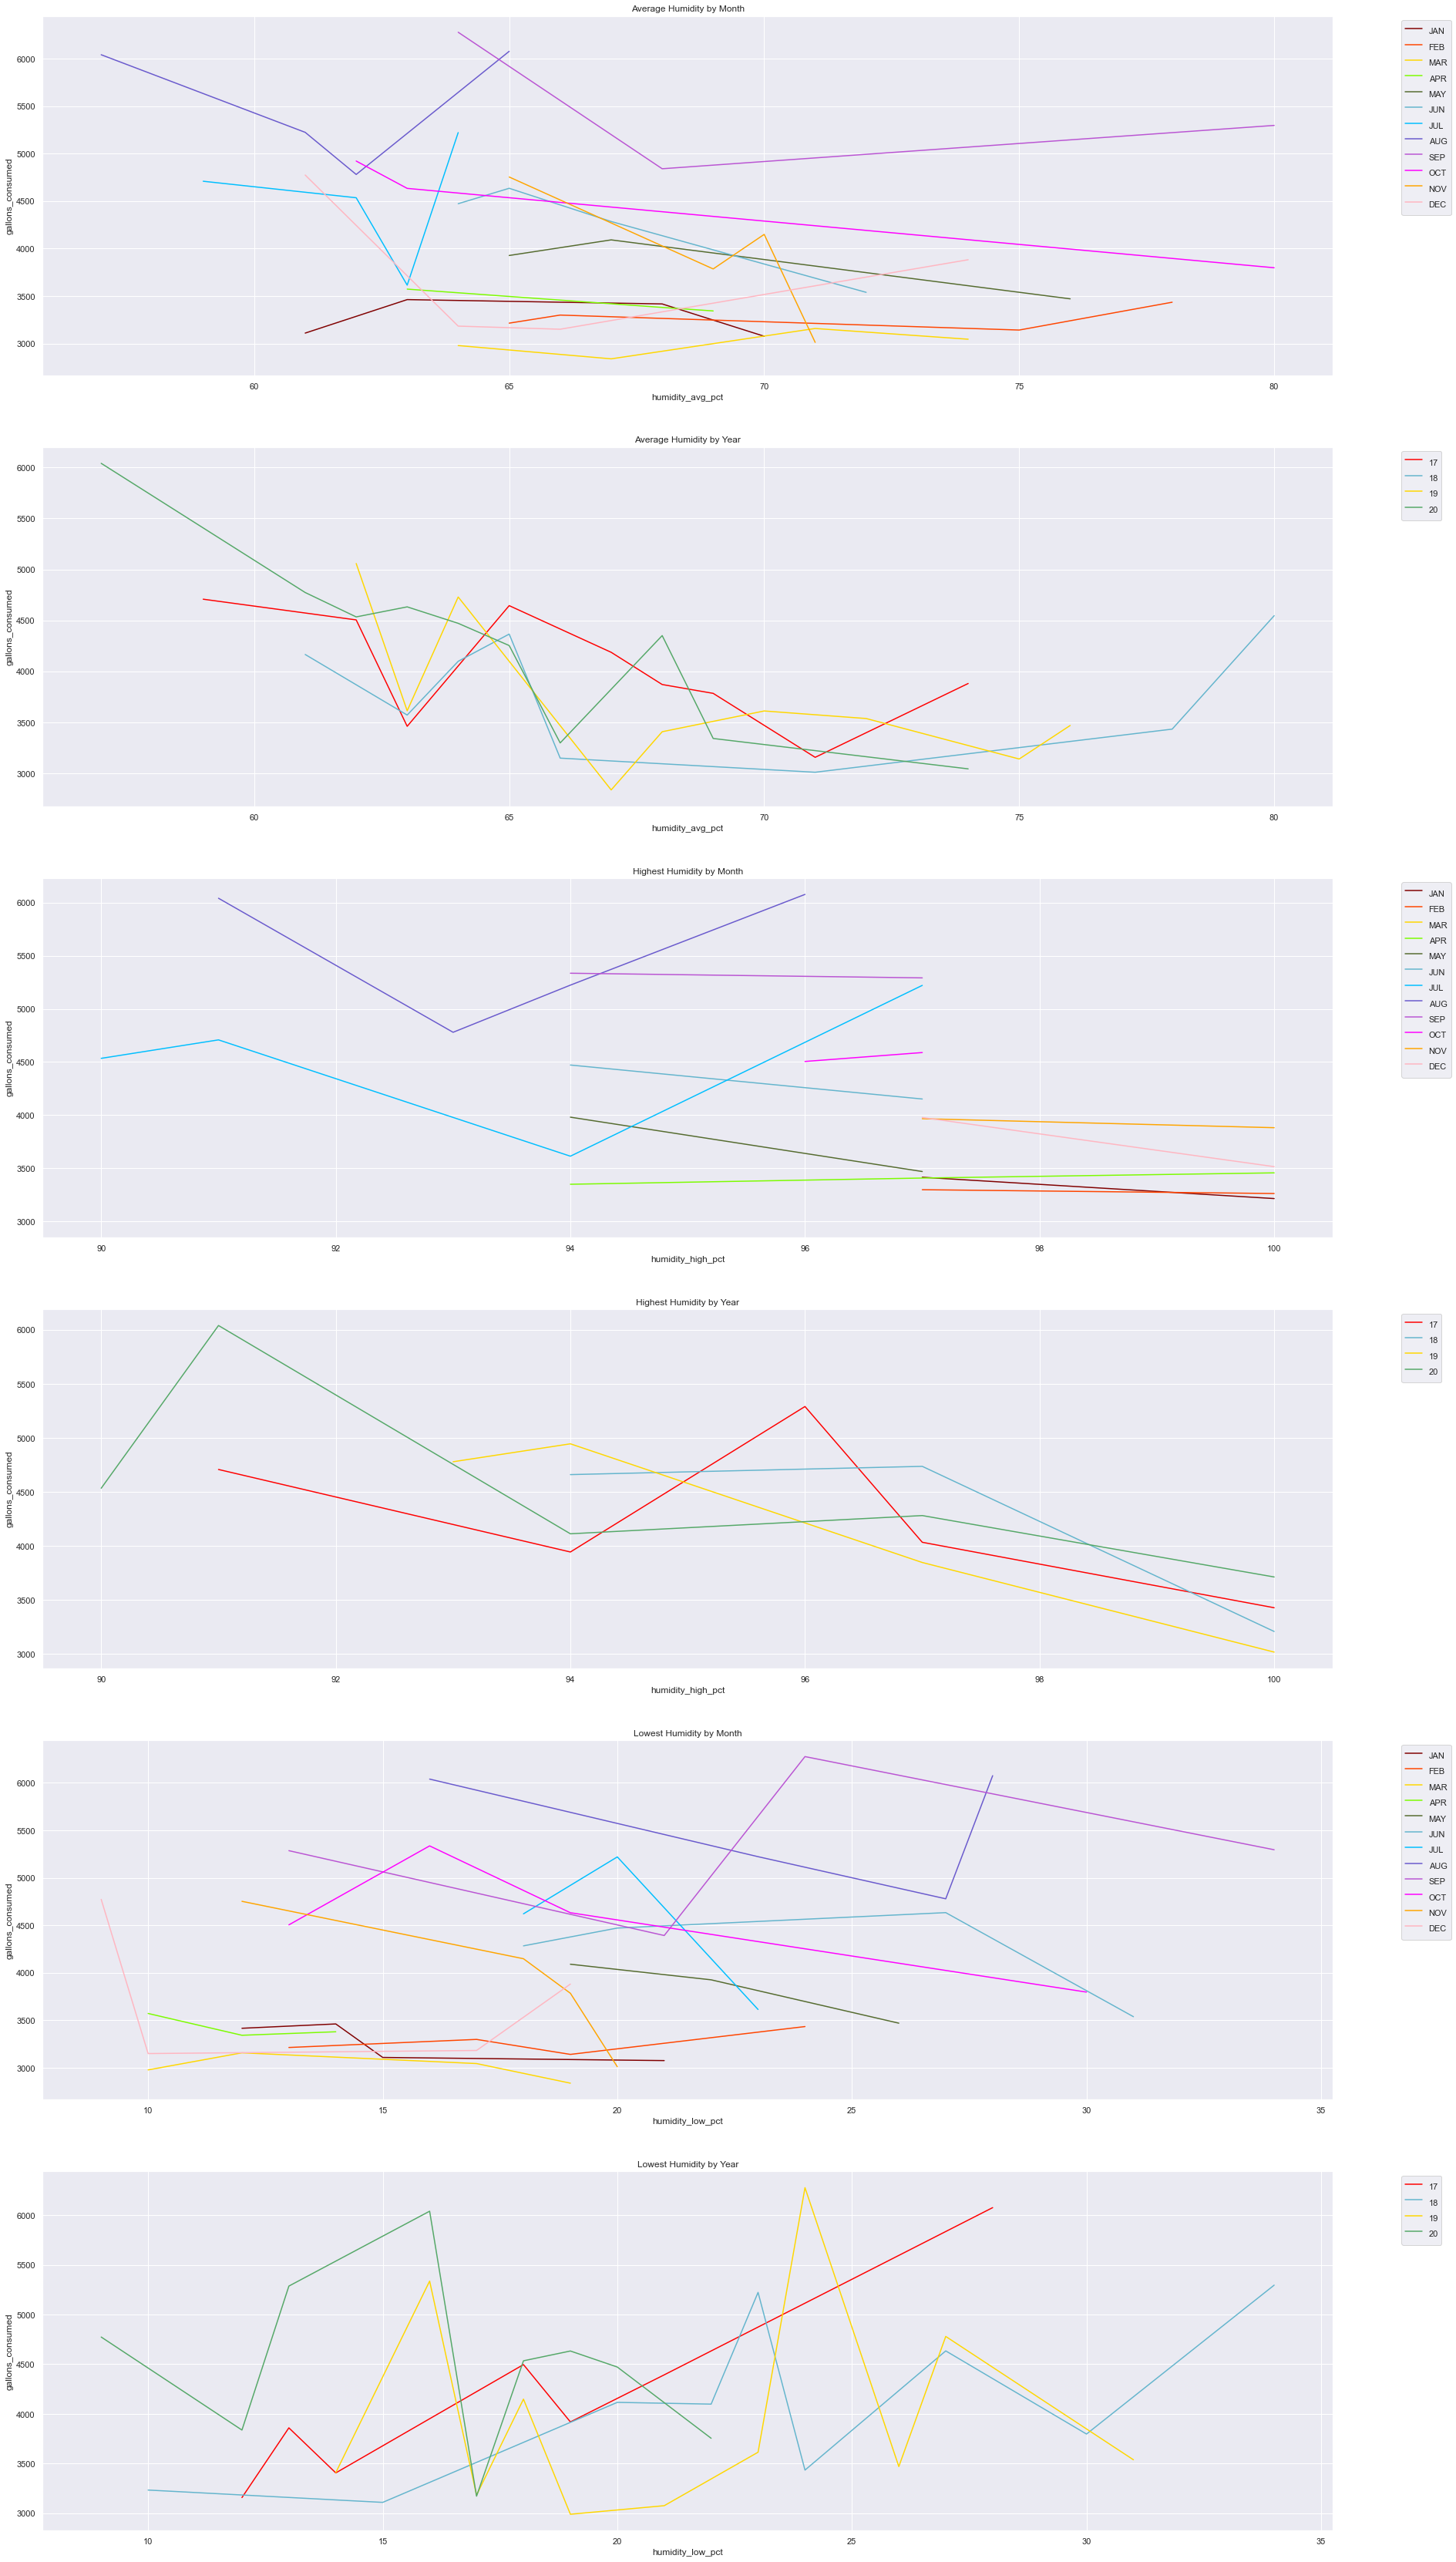

In [62]:
plt.subplots(6,1, figsize=(30,60), sharey=True)
sns.set(style="darkgrid")

plt.subplot(6,1,1)
sns.lineplot(y=saws.gallons_consumed, x=saws.humidity_avg_pct, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Average Humidity by Month')

plt.subplot(6,1,2)
sns.lineplot(y=saws.gallons_consumed, x=saws.humidity_avg_pct, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Average Humidity by Year')

plt.subplot(6,1,3)
sns.lineplot(y=saws.gallons_consumed, x=saws.humidity_high_pct, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Highest Humidity by Month')

plt.subplot(6,1,4)
sns.lineplot(y=saws.gallons_consumed, x=saws.humidity_high_pct, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Highest Humidity by Year')

plt.subplot(6,1,5)
sns.lineplot(y=saws.gallons_consumed, x=saws.humidity_low_pct, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Lowest Humidity by Month')

plt.subplot(6,1,6)
sns.lineplot(y=saws.gallons_consumed, x=saws.humidity_low_pct, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Lowest Humidity by Year')

### Takeaways:
- 

___

Text(0.5, 1.0, 'Lowest Pressure by Year')

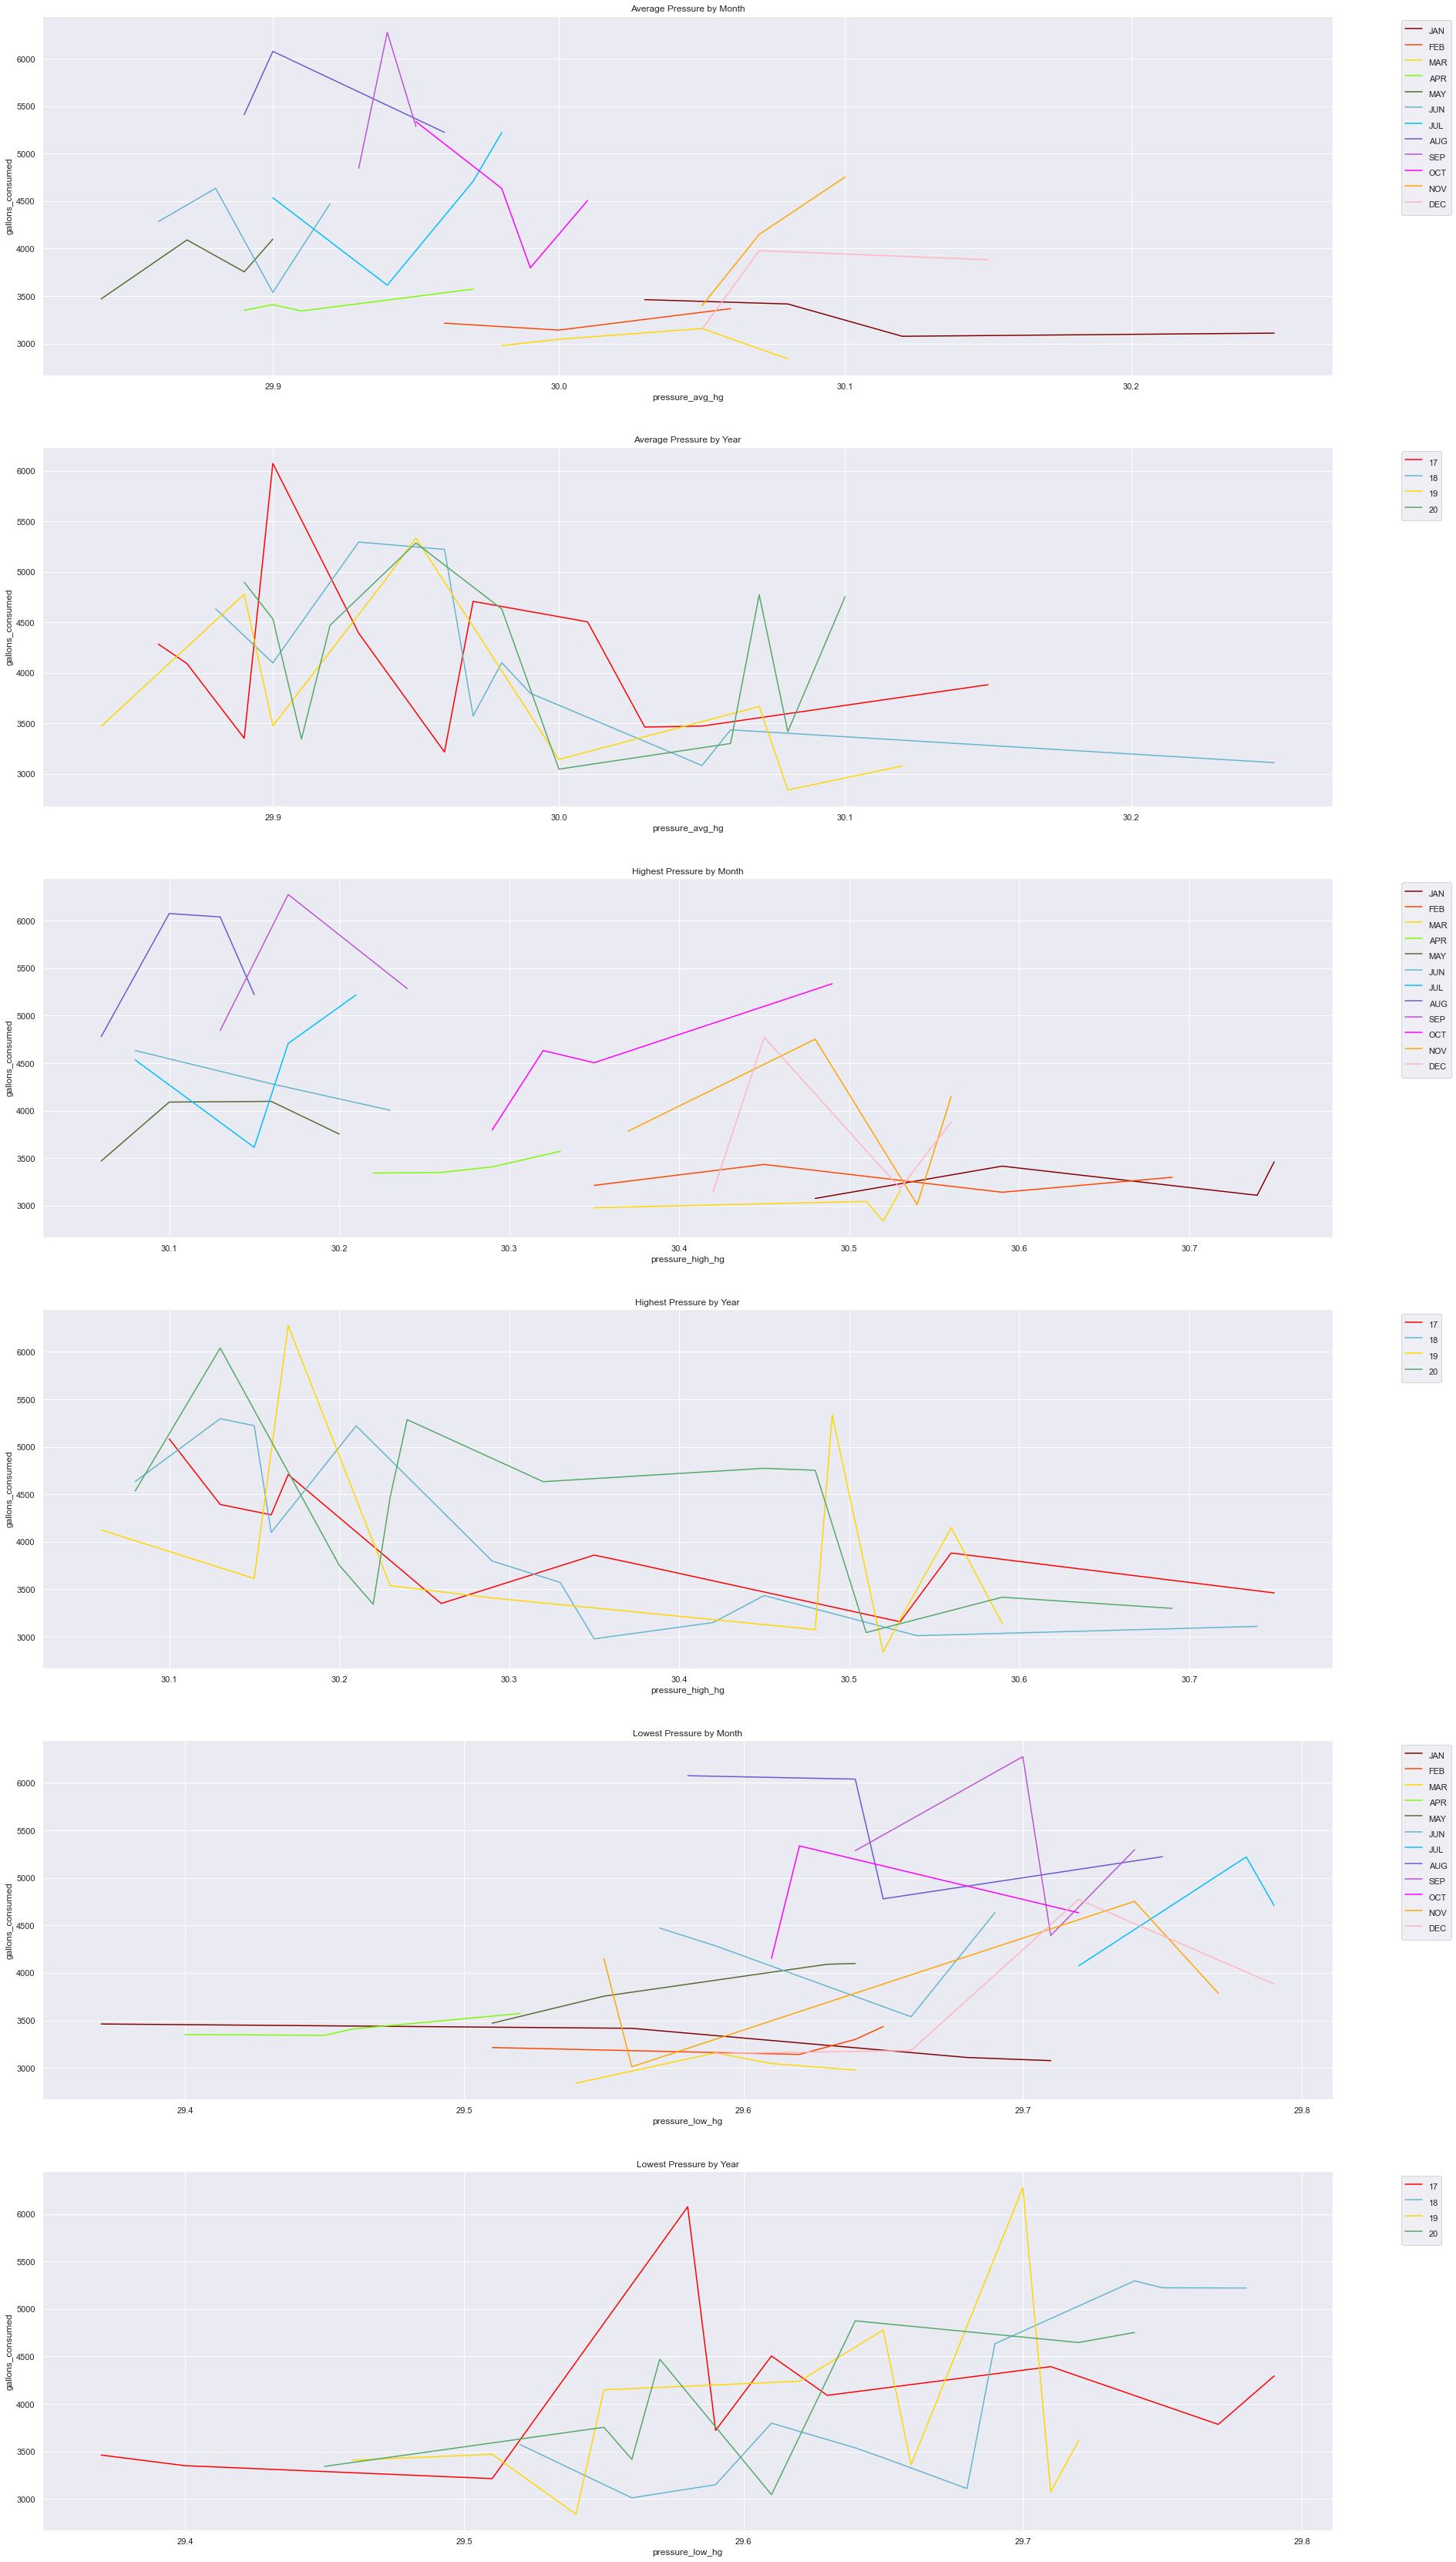

In [63]:
plt.subplots(6,1, figsize=(30,60), sharey=True)
sns.set(style="darkgrid")

plt.subplot(6,1,1)
sns.lineplot(y=saws.gallons_consumed, x=saws.pressure_avg_hg, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Average Pressure by Month')

plt.subplot(6,1,2)
sns.lineplot(y=saws.gallons_consumed, x=saws.pressure_avg_hg, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Average Pressure by Year')

plt.subplot(6,1,3)
sns.lineplot(y=saws.gallons_consumed, x=saws.pressure_high_hg, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Highest Pressure by Month')

plt.subplot(6,1,4)
sns.lineplot(y=saws.gallons_consumed, x=saws.pressure_high_hg, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Highest Pressure by Year')

plt.subplot(6,1,5)
sns.lineplot(y=saws.gallons_consumed, x=saws.pressure_low_hg, 
             hue=saws.month, palette=month_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Lowest Pressure by Month')

plt.subplot(6,1,6)
sns.lineplot(y=saws.gallons_consumed, x=saws.pressure_low_hg, 
             hue=saws.year, palette=year_colors, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plt.title('Lowest Pressure by Year')

### Takeaways:
- 

___

No handles with labels found to put in legend.


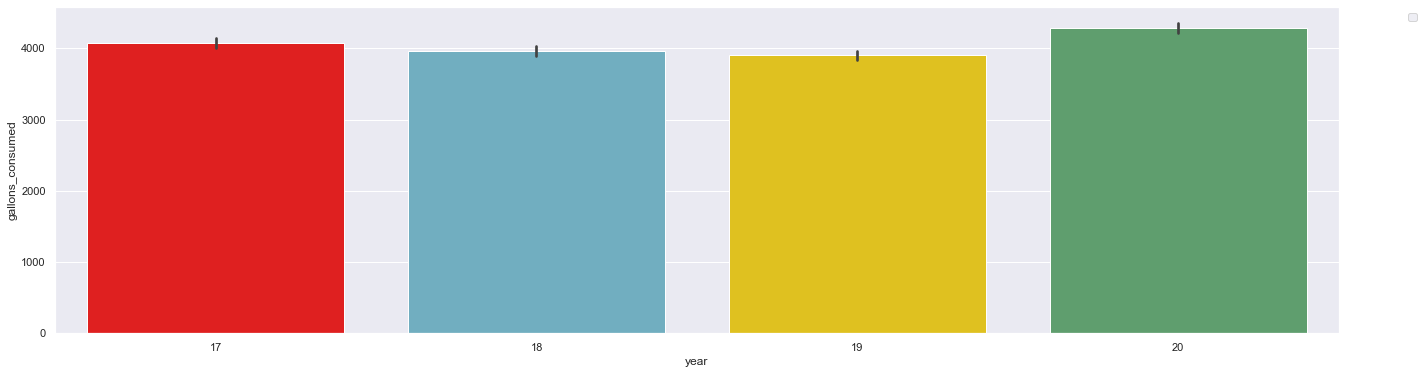

In [57]:
plt.figure(figsize=(23,6))
sns.barplot(x=saws.year, y=saws.gallons_consumed, palette=year_colors)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- 2019 had the lowest average water consumption.
- 2020 had the highest average water consumption.
    - this may be due to the pandemic and the higher numbers of people being in the hospital and/or searching for medical help.
___

No handles with labels found to put in legend.


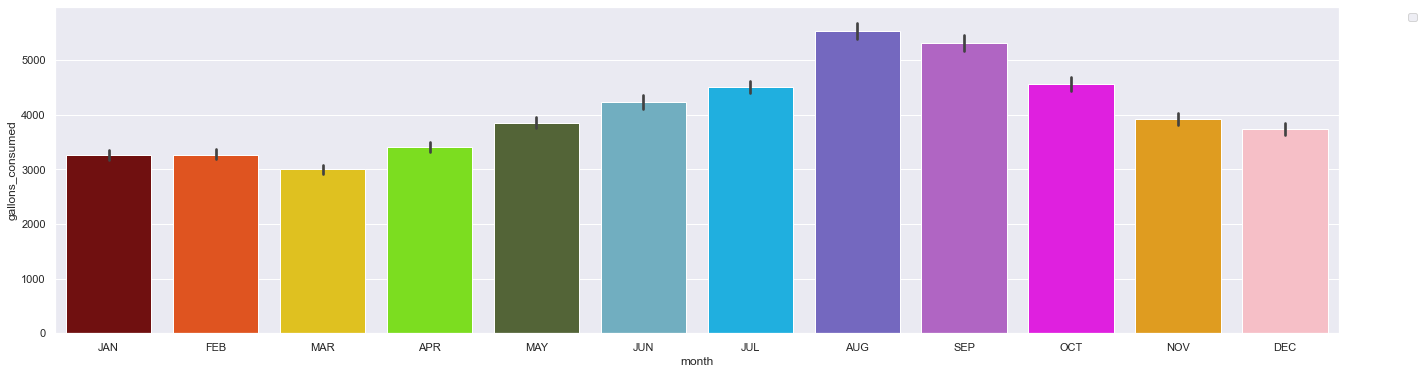

In [65]:
plt.figure(figsize=(23,6))
sns.barplot(x=saws.month, y=saws.gallons_consumed, palette=month_colors)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- there does seem to be a steady increase in water consumption when going into summer months such as June, July, Auguest(which has the most gallons consumed over all).
    - it then start to see a steady decrease going into fall and winter months.